In [1]:
import numpy as np
import os
import openmc
%matplotlib inline
import matplotlib.pyplot as plt
os.system('export OPENMC_CROSS_SECTIONS="/Users/stefano/Desktop/openMC_TPMS/endfb-viii.0-hdf5/cross_sections.xml"')

0

<IncidentNeutron: Xe135>
135
{2: <Reaction: MT=2 (n,elastic)>, 16: <Reaction: MT=16 (n,2n)>, 17: <Reaction: MT=17 (n,3n)>, 22: <Reaction: MT=22 (n,na)>, 28: <Reaction: MT=28 (n,np)>, 32: <Reaction: MT=32 (n,nd)>, 51: <Reaction: MT=51 (n,n1)>, 52: <Reaction: MT=52 (n,n2)>, 53: <Reaction: MT=53 (n,n3)>, 54: <Reaction: MT=54 (n,n4)>, 55: <Reaction: MT=55 (n,n5)>, 56: <Reaction: MT=56 (n,n6)>, 57: <Reaction: MT=57 (n,n7)>, 58: <Reaction: MT=58 (n,n8)>, 59: <Reaction: MT=59 (n,n9)>, 60: <Reaction: MT=60 (n,n10)>, 61: <Reaction: MT=61 (n,n11)>, 62: <Reaction: MT=62 (n,n12)>, 63: <Reaction: MT=63 (n,n13)>, 64: <Reaction: MT=64 (n,n14)>, 65: <Reaction: MT=65 (n,n15)>, 66: <Reaction: MT=66 (n,n16)>, 91: <Reaction: MT=91 (n,nc)>, 102: <Reaction: MT=102 (n,gamma)>, 103: <Reaction: MT=103 (n,p)>, 104: <Reaction: MT=104 (n,d)>, 105: <Reaction: MT=105 (n,t)>, 107: <Reaction: MT=107 (n,a)>, 203: <Reaction: MT=203 (n,Xp)>, 204: <Reaction: MT=204 (n,Xd)>, 205: <Reaction: MT=205 (n,Xt)>, 207: <Reaction:

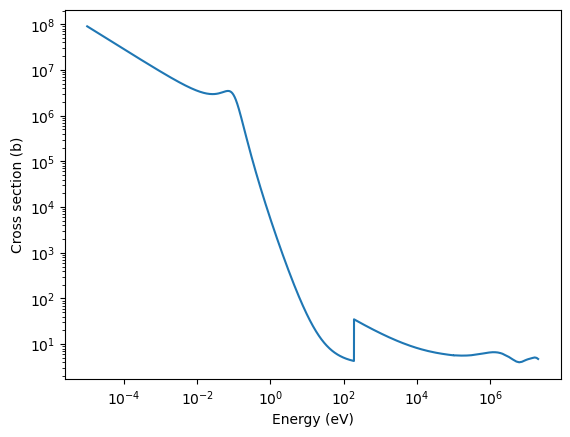

In [2]:

# Load cross section data for a specific isotope, e.g., Xe-135
xe135 = openmc.data.IncidentNeutron.from_hdf5('/Users/stefano/Desktop/openMC_TPMS/endfb-viii.0-hdf5/neutron/Xe135.h5')
print(xe135)
print(xe135.mass_number)
print(xe135.reactions)
total = xe135[1]

# # Get the cross section object
energies = xe135.energy['294K']
total_xs = total.xs['294K'](energies)
print(total_xs)
plt.loglog(energies, total_xs)
plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')
plt.show()



[169.72773582 167.16820848 164.72289191 ...   5.92536247   5.79020935
   5.72052338]


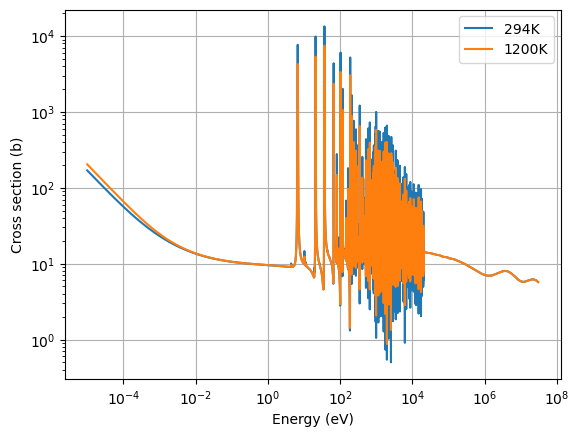

[169.72773582 167.16820848 164.72289191 ...   5.92536247   5.79020935
   5.72052338]


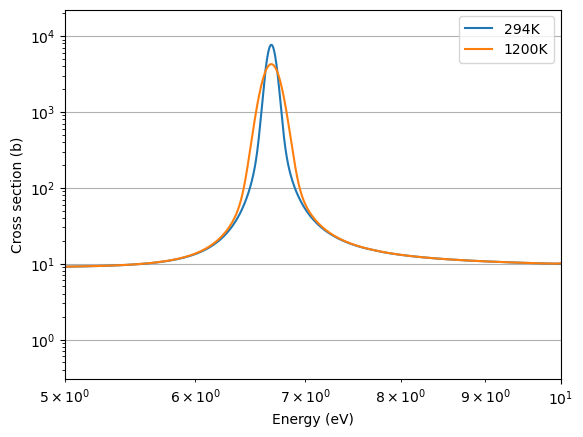

In [3]:
# Load cross section data for a specific isotope, e.g., Xe-135
u238 = openmc.data.IncidentNeutron.from_hdf5('/Users/stefano/Desktop/openMC_TPMS/endfb-viii.0-hdf5/neutron/U238.h5')
total = u238[1]

# # Full range plot
plt.figure()
energies = u238.energy['294K']
total_xs = total.xs['294K'](energies)
print(total_xs)
plt.loglog(energies, total_xs)

energies = u238.energy['1200K']
total_xs = total.xs['1200K'](energies)
plt.loglog(energies, total_xs)

plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')
plt.legend(['294K', '1200K'])
plt.grid()
plt.show()

# # Around a resonance
plt.figure()
energies = u238.energy['294K']
total_xs = total.xs['294K'](energies)
print(total_xs)
plt.loglog(energies, total_xs)

energies = u238.energy['1200K']
total_xs = total.xs['1200K'](energies)
plt.loglog(energies, total_xs)

plt.xlabel('Energy (eV)')
plt.ylabel('Cross section (b)')
plt.legend(['294K', '1200K'])
plt.xlim([5, 10])
plt.grid()
plt.show()